# Import Packages

In [4]:
import jgraph as jg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Create Dataframe and Find Unique Value for Node Connection

In [5]:
df = pd.read_excel("./data/Alibaba-network.xlsx",index_col = 0)
Adjacency_Number = df.values
print('Unique Value For Node Connection: ', df.describe().loc[['max']].squeeze().unique().astype(int))

# Find Column Row Value of where Edges Locates 
# Column and Row Value represent the number of Node
rows, cols = np.where(Adjacency_Number != 0)
rows = rows.tolist()
cols = cols.tolist()
k = 1
rows = [x+k for x in rows ]
cols = [x+k for x in cols ]
tuple_list_temp = merge(rows, cols)

# Create a Dictinoary organizing the number of Edges Happening
# Convert (a,b),(b,a) into {(a,b) : 2 }

l = [tuple(sorted(i)) for i in tuple_list_temp]
Tuple_list_Counter = Counter(l)
Tuple_list_Dic = dict(Tuple_list_Counter)
Connection_Number = len(Tuple_list_Dic)


# Generate tuple list only record unique value of Edges
# Consider (a,b),(b,a) the same Edge

tuple_list = []
for tuple_value in Tuple_list_Dic:
    tuple_list.append(tuple_value)
 


Unique Value For Node Connection:  [1 2 3 0]


# Visualization of Social Network

In [8]:
import jgraph
jgraph.draw(tuple_list)

# Network Density - Stats

In [46]:
potential_connection_number = int(527*526/2)
Connection_number = (len(tuple_list))/2
Network_Density = Connection_Number/potential_connection_number
print("Potential_connection_number : {0}".format(potential_connection_number))
print("Connection_number : {0}".format(Connection_Number))
print("Network_Density : {:.1%} ".format(Network_Density))

Potential_connection_number : 138601
Connection_number : 428
Network_Density : 0.3% 


### Assumption and Insight

Based on the number we have calculated from the data set provided, we concluded that this social network is a low-density network, also known as sparsed network. Considering that the data set is derived from e-commerce business, we have the following insights that we believe is worth discussing.

1. The speed of the information transmission within the network is slow. (High Communicational cost)
    - Advantages: Negative words of mouth spread slower and are easier to constrained. 
    - Disadvantages: It might take relatively more marketing efforts for the company to build brand image.
----------------------------------------------------------------------------------------------------------------------

# Degree Centrality

           Degree
count  527.000000
mean     1.622391
std      1.240826
min      0.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     10.000000


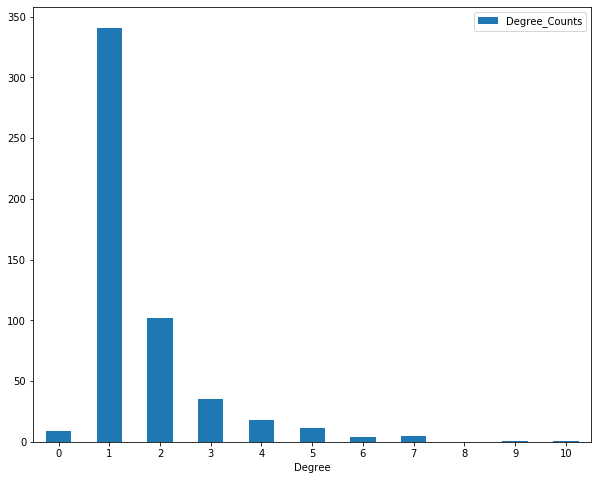

In [45]:
# Calculate Degree Centrality for every node and make it a list
degree_list=[]
for x in range(1,528):
    degree = 0
    for tuple_value in Tuple_list_Dic:
        if x in tuple_value:
            degree +=1
    
    degree_list.append(degree)
    
# Convert Degree List into Dataframe   
df_degree = pd.DataFrame(degree_list, columns = ['Degree'],index=[x for x in range(1,528)])

# Concat Degree List Dataframe and Original Dataframe
df_with_degree = pd.concat([df, df_degree], axis=1)

# df_with_degree['Degree'].describe()
degree_label_list = [0,1,2,3,4,5,6,7,8,9,10]
degree_count_list= list(df_with_degree.groupby('Degree').count().iloc[:,1])
degree_count_list.insert(8,0)
clean_degree_df = pd.DataFrame(
    {'Degree': degree_label_list,
     'Degree_Counts': degree_count_list,
    })
print(df_with_degree['Degree'].describe().to_frame())
ax = clean_degree_df.plot.bar(x='Degree', y='Degree_Counts', rot=0,figsize=(10,8))


In [29]:
df_new = df_with_degree.sort_values(by=['Degree'],ascending=False)
top_10_degree_list = list(df_new['Degree'].head(10))
top_10_degree_node_list = list(df_new.head(10).index)
degree_info_list = merge(top_10_degree_node_list, top_10_degree_list)


# Closeness


In [34]:
def get_g_sym(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    return gr

In [33]:
g_sym = get_g_sym(Adjacency_Number)

In [44]:
closeness_data = nx.closeness_centrality(g_sym)
clo_data_list = []
for i, j in closeness_data.items():
     clo_data_list.append((i+1,j))
clo_data_list.sort(key = lambda x: x[1], reverse = True)
clo_data_list[:10]
top_10_closeness_node_list = [x[0] for x in clo_data_list[:10]]
top_10_closeness_list = [x[1] for x in clo_data_list[:10]]


# Betweenness


In [36]:
pos = nx.spring_layout(g_sym)
bet_data = nx.betweenness_centrality(g_sym, normalized=True, endpoints=True)

In [37]:
bet_data_list = []
for i, j in bet_data.items():
     bet_data_list.append((i+1,j))


In [38]:
bet_data_list.sort(key = lambda x: x[1], reverse = True)
bet_data_list[:10]
top_10_betweeness_node_list = [x[0] for x in bet_data_list[:10]]
top_10_betweeness_list = [x[1] for x in bet_data_list[:10]]


# Identify the Key Opinion Leader

In [39]:
print("Top 10 Degree Nodes : {0} ".format(top_10_degree_node_list))
print("Top 10 Closeness Nodes : {0} ".format(top_10_closeness_node_list))
print("Top 10 Betweeness Nodes : {0} ".format(top_10_betweeness_node_list))

Top 10 Degree Nodes : [1, 78, 187, 362, 521, 293, 498, 343, 284, 405] 
Top 10 Closeness Nodes : [162, 78, 127, 92, 277, 1, 29, 4, 303, 311] 
Top 10 Betweeness Nodes : [162, 311, 78, 461, 293, 277, 1, 4, 135, 303] 


# Questions & Reflection

1. Whether this data set is collected with high constraint ? We are wondering about if the data set is representative enough to describe this social network.
